In [5]:
import pandas as pd
from pycaret.clustering import *

# 1. load data (from same folder)
df = pd.read_csv("segmentation data.csv")
print(df.shape)
df.head()


(2000, 8)


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
# remove any non-feature columns if present
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])

s = setup(
    data=df,
    session_id=123,
    normalize=True,
    use_gpu=False,
)


,Description,Value
0,Session id,123
1,Original data shape,"(2000, 8)"
2,Transformed data shape,"(2000, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [7]:
kmeans = create_model("kmeans")
results = assign_model(kmeans)
results.head()


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2246,523.2093,1.5095,0,0,0


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,Cluster 2
1,100000002,1,1,22,1,150773,1,2,Cluster 3
2,100000003,0,0,49,1,89210,0,0,Cluster 1
3,100000004,0,0,45,1,171565,1,1,Cluster 3
4,100000005,0,0,53,1,149031,1,1,Cluster 3


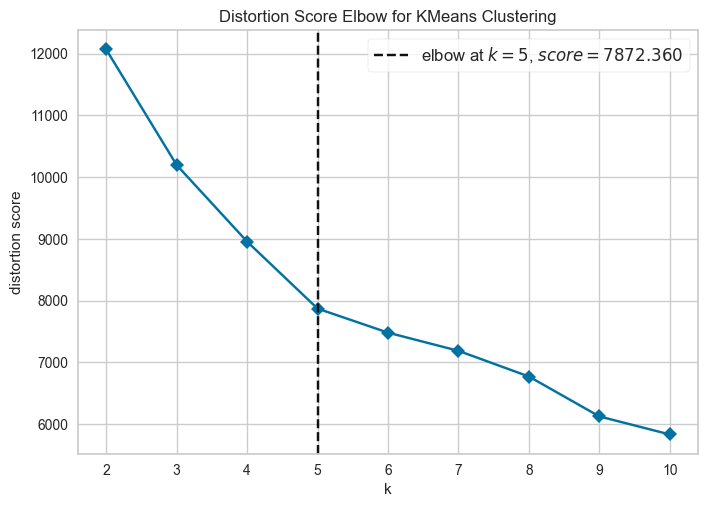

In [8]:
plot_model(kmeans, plot="elbow")
plot_model(kmeans, plot="cluster")


In [9]:
save_model(kmeans, "segmentation_kmeans_model")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['ID', 'Sex', 'Marital status',
                                              'Age', 'Education', 'Income',
                                              'Occupation', 'Settlement size'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'segmentation_kmeans_model.pkl')